In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# APARTADO B

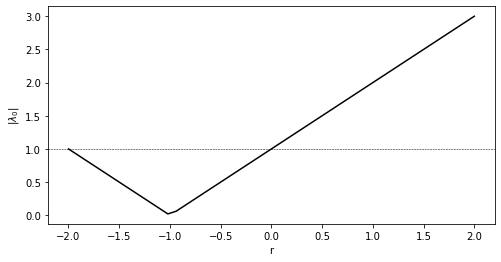

In [4]:
#estabilidad de x*=0
def ly(figx=None):
    r = np.linspace(-2, 2, 50)
    
    l = np.abs(-(1 + r))
    
    figx.plot(r, l, 'k')
    figx.axhline(1, color='k', lw=0.5, ls='--')
    
    figx.set_xlabel('r')
    figx.set_ylabel(r'$|\lambda_0|$')
fig, fig1 = plt.subplots(1,1, figsize=(8,4))

ly(figx=fig1)

plt.savefig('lambda_3a.png')

# APARTADO C

In [5]:
#funcion mapa
def mapa(r, x):
    return -(1 - r) * x - x ** 2 - (2 * x ** 3)

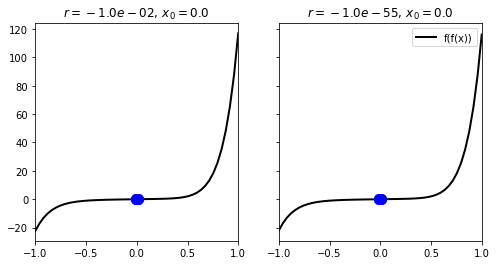

In [6]:
#Defino una funcion que me muestra graficamente varias iteraciones
def cobweb(r, x0, n, figx=None):
    #Dibujo la grafica inicial
    t = np.linspace(-1, 1)
    f2 = mapa(r, mapa(r,t))
    figx.plot(t, f2, 'k', lw=2, label='f(f(x))')
    #figx.plot([0, 1], [0, 1], 'k', lw=2)
    #Hago las iteraciones
    x = mapa(r,x0)
    for i in range(n):
        y= mapa(r, x)
        #dibujo el camino de la iteracion a traves de los valores
        figx.plot([x, x], [x, y], 'b')
        figx.plot([x, y], [y, y], 'b')
        #aumento la opacidad de los puntos con cada iteracion
        figx.plot([x], [y], 'ob', ms=10, alpha=(i + 1) / n)
        x = y
    #limites de las graficas y titulo
    figx.set_xlim(-1, 1)
    #figx.set_ylim(0, 1)
    figx.set_title(f"$r={r:.1e}, \, x_0={x0:.1f}$")
    
#Hago el plot
fig, (fig2, fig3) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
cobweb(-1e-2, 0.01, 11, figx=fig2)
cobweb(-1e-55, 0.01, 11, figx=fig3)
plt.legend()
plt.savefig('ciclo2_2.png')

<ipython-input-5-a6604ffd08b0>:3: RuntimeWarning: overflow encountered in power
  return -(1 - r) * x - x ** 2 - (2 * x ** 3)
<ipython-input-5-a6604ffd08b0>:3: RuntimeWarning: overflow encountered in multiply
  return -(1 - r) * x - x ** 2 - (2 * x ** 3)
<ipython-input-5-a6604ffd08b0>:3: RuntimeWarning: overflow encountered in square
  return -(1 - r) * x - x ** 2 - (2 * x ** 3)
<ipython-input-5-a6604ffd08b0>:3: RuntimeWarning: invalid value encountered in subtract
  return -(1 - r) * x - x ** 2 - (2 * x ** 3)


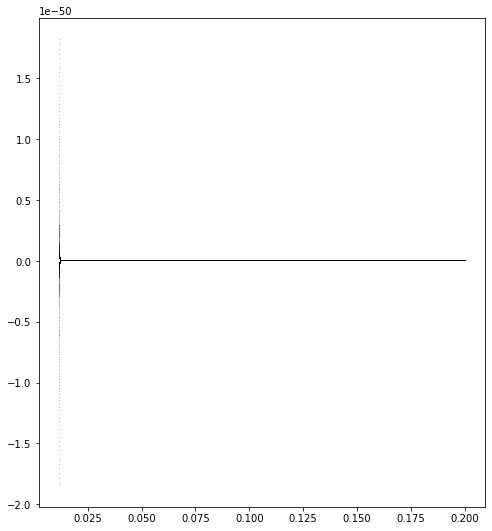

In [27]:

def bifur(figx=None):
    n = 10000
    r = np.linspace(-0.3, 0.2, n)
    #para el mapa logistico haremos 1000 iteraciones con la misma condicion inicial
    it = 10000
    x= 1e-1 * np.ones(n)
    #valor inicial del vector lyapunov
    ly = np.zeros(n)

    #Hacemos las simulaciones y ploteamos
#iteramos
    for i in range(it):
        x = mapa(r, x)
    #exponente de lyapunov
    #diagrama de bifurcacion
        if i >= (it-100):
            figx.plot(r, x, ',k', alpha=.25)
            
fig, fig4 = plt.subplots(1, 1, figsize=(8, 9), sharey=True)

bifur(figx=fig4)